# Inroduction

# Analyse exploratoire des données (EDA)

In [103]:
import pandas as pd
# Afficher un aperçu des données
healthcare_data = pd.read_csv(".\healthcare-dataset-stroke-data.csv", delimiter=",")
healthcare_data.head(3)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [104]:
healthcare_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [105]:
# Vérifier l'intégrité des données
healthcare_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Un niveau de glucose dans le sang de 271.74 mg/dL (milligrammes par décilitre) serait considéré comme élevé et pourrait indiquer une hyperglycémie.

- Un niveau de glucose dans le sang de 55.12 mg/dL serait considéré comme relativement bas et pourrait indiquer une hypoglycémie.

- L'âge moyen est de 43 ans, la personne la plus âgée a 82 ans et l'individu le plus jeune a 0.08 ans soit environ 2 jours.

In [106]:
# Vérifier l'intégrité des données
healthcare_data.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


<Axes: >

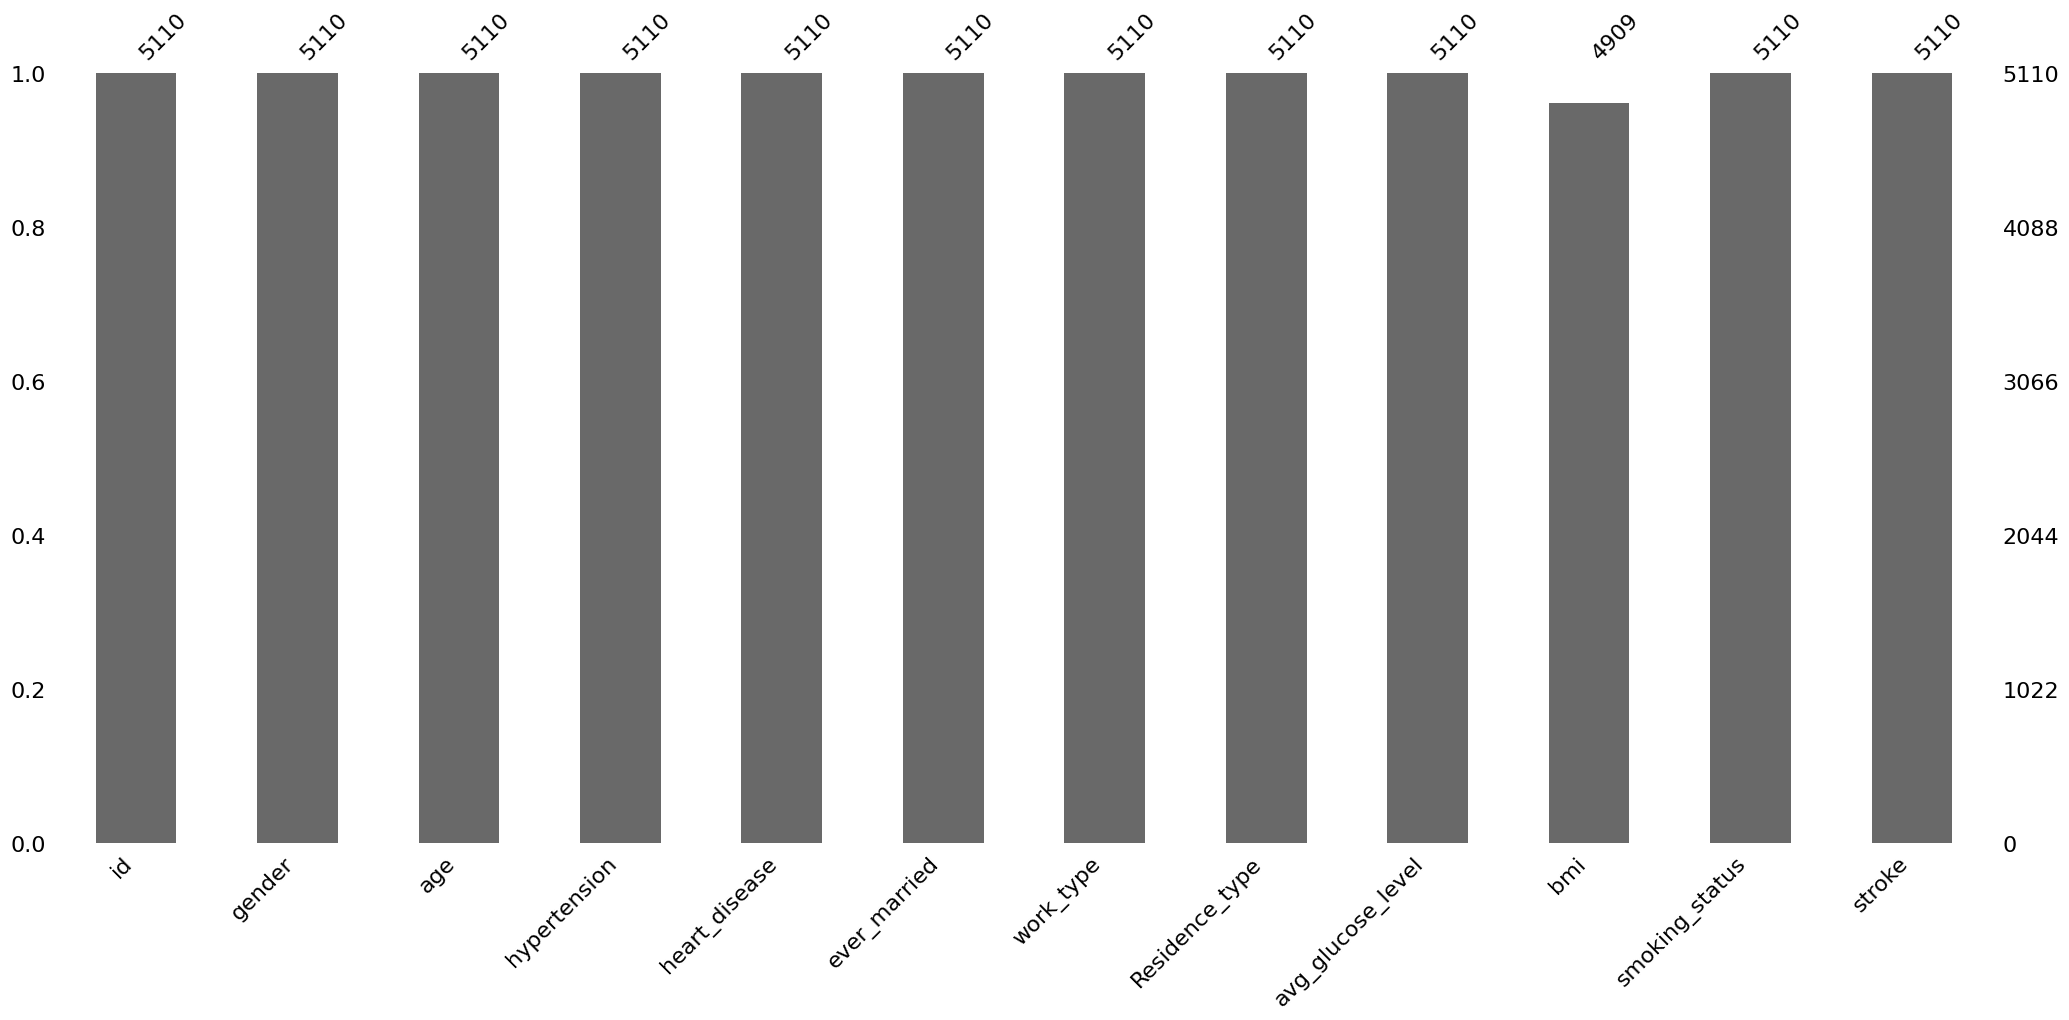

In [107]:
# Recherche de valeurs manquantes
import missingno as msno
msno.bar(healthcare_data)

In [108]:
healthcare_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

► On remarque que la colonne "bmi" a 201 valeurs manquantes. On peut se permettre de supprimer ces lignes qui sont peu nombreuses. 

In [109]:
healthcare_data = healthcare_data.dropna(subset=['bmi'])
healthcare_data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [110]:
healthcare_data['gender'].value_counts()


gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [111]:
# On enlève la ligne qui contient "Other" pour la colonne genre car non représentative
healthcare_data = healthcare_data[healthcare_data['gender'] != 'Other']
healthcare_data['gender'].value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [112]:
# On enlève les lignes correspondantes aux enfants de moins de 10 ans de notre analyse
healthcare_data = healthcare_data[healthcare_data['age'] >= 10]

In [113]:
# Vérification des valeurs uniques pour les colonnes catégorielles
def get_unique(df):
    for column in df.columns:
        if not column in ["id", "age", "avg_glucose_level", "bmi"]: 
            print(column , ":",  df[column].unique())
get_unique(healthcare_data)


gender : ['Male' 'Female']
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke : [1 0]


In [114]:
print("Nombre d'observations :", healthcare_data.shape[0])
print("Nombre d'AVC :", healthcare_data.loc[healthcare_data.stroke==1].shape[0])

Nombre d'observations : 4449
Nombre d'AVC : 209


► On remarque qu'il y a un nombre faible de cas d'accident vasculaire cérébral (cas positifs) dans notre jeu de données, avec seulement *209* instances d'AVC sur un total de *4449* observations disponibles.
Notre ensemble de données est déséquilibré et cela affecterait les performances du modèle qu'on va utiliser.

In [115]:
# labelisation pour la data augmentation
from sklearn.preprocessing import LabelEncoder

def get_annotation(encoder, variable_name):
    print(variable_name)
    for i, category in enumerate(encoder.classes_):
        print(f"{category}: {i}")



label_encoder = LabelEncoder()
healthcare_data['gender'] = label_encoder.fit_transform(healthcare_data['gender'])
get_annotation(label_encoder, "Gender :")
print("\n")

healthcare_data['ever_married'] = label_encoder.fit_transform(healthcare_data['ever_married'])
get_annotation(label_encoder, 'Ever married :')
print("\n")

healthcare_data['work_type'] = label_encoder.fit_transform(healthcare_data['work_type'])
get_annotation(label_encoder, 'Work type :')
print("\n")

healthcare_data['Residence_type'] = label_encoder.fit_transform(healthcare_data['Residence_type'])
get_annotation(label_encoder, 'Residence type :')
print("\n")

healthcare_data['smoking_status'] = label_encoder.fit_transform(healthcare_data['smoking_status'])
get_annotation(label_encoder, 'Smoking status :')



Gender :
Female: 0
Male: 1


Ever married :
No: 0
Yes: 1


Work type :
Govt_job: 0
Never_worked: 1
Private: 2
Self-employed: 3
children: 4


Residence type :
Rural: 0
Urban: 1


Smoking status :
Unknown: 0
formerly smoked: 1
never smoked: 2
smokes: 3


In [116]:
# Data Augmentation

from imblearn.over_sampling import SMOTE


# on separate les features et la variable d'interet "stroke"
X = healthcare_data.drop('stroke', axis=1)
y = healthcare_data['stroke']


# data augmentation SMOTE de la classe minoritaire (stroke =1)
smote = SMOTE(sampling_strategy='minority')
X_augmented, y_augmented = smote.fit_resample(X, y)

# data augmentée
healthcare_data = pd.concat([pd.DataFrame(X_augmented, columns=X.columns),
                            pd.DataFrame(y_augmented, columns=['stroke'])], axis=1)

# vérification
print("Nombre d'observations (aprés SMOTE) :", healthcare_data.shape[0])
print("Nombre d'AVC (aprés SMOTE) :", healthcare_data.loc[healthcare_data.stroke==1].shape[0])

Nombre d'observations (aprés SMOTE) : 8480
Nombre d'AVC (aprés SMOTE) : 4240


In [117]:
healthcare_data.tail(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8477,17394,1,66.958232,0,0,0,2,0,98.261352,30.677641,0,1
8478,54852,1,71.478351,0,0,1,3,0,178.589248,29.759474,2,1
8479,31093,0,65.078569,0,0,1,2,0,207.013127,29.989822,1,1


► On remarque que nombre d'observations total a augmenté après l'application de SMOTE et que le nombre d'observations pour la classe minoritaire (stroke = 1) a augmenté pour se rapprocher du nombre d'observations pour la classe majoritaire (stroke = 0), cela confirme qu'on a obtenu plus de données et que les classes ont été rééquilibrées avec cette méthode.

# Modélisation

 Supposons que nous choisissons l'âge comme la seule caractéristique à utiliser pour prédire les AVC (variable indépendante/explicative). 

In [118]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler

X = healthcare_data[['age']]
y = healthcare_data['stroke']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
from sklearn.model_selection import train_test_split
# on va diviser les données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Commençons par la *régression logistique*

La régression logistique est couramment utilisée dans les cas où on doit prédire une variable binaire, càd une variable qui a seulement deux valeurs possibles comme pour "stroke" (variable dépendante) où on a deux possibilité (1 ou bien 0).

La régression logistique utilise la fonction logistique (sigmoïde), pour modéliser la relation entre la variable indépendante (l'age dans notre cas) et la probabilité de la variable dépendante (stroke).

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Modélisation avec la regression logistique
model =  LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# affichage des metrics
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1260
           1       0.73      0.80      0.77      1284

    accuracy                           0.75      2544
   macro avg       0.75      0.75      0.75      2544
weighted avg       0.75      0.75      0.75      2544



Dans le domaine de la santé, la métrique la plus importante pour détecter la plupart des cas correctement est le Recall qui mesure la proportion de cas positifs réels (dans ce contexte, les cas d'AVC) qui sont correctement identifiés par le modèle.


Le recall pour la classe 0 (non-AVC) est de 0,7. Cela signifie que le modèle a correctement identifié 70 % des vrais cas de non-AVC.

Le recall pour la classe 1 (AVC) est de 0,8. Cela signifie que le modèle a correctement identifié 80 % des vrais cas d'AVC.

# Conclusion